In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import euclidean_distances
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

In [158]:
c1 = np.array([[1.0, 1.5]])
c2 = np.array([[-1.0, -0.5]])
c3 = np.array([[1.0, -0.5]])

In [159]:
dist_1_2 = euclidean_distances(c1, c2)
dist_1_3 = euclidean_distances(c1, c3)

# реализация по формуле
self_1_2 = math.sqrt((c2[0][0]-c1[0][0])**2 + (c2[0][1]-c1[0][1])**2)
self_1_3 = math.sqrt((c3[0][0]-c1[0][0])**2 + (c3[0][1]-c1[0][1])**2)

print(f"The distances:\n\
between the 1st and the 2nd: {round(self_1_2, 3)};\n\
between the 1st and the 3rd: {self_1_3}.")

The distances:
between the 1st and the 2nd: 2.828;
between the 1st and the 3rd: 2.0.


In [160]:
clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

In [161]:
def dist(a, b):
    d_no_sqrt = np.array([0])
    for i in range(len(a)):
        d_no_sqrt = np.concatenate([d_no_sqrt, np.array([(a[i][0]-b[0][0])**2 + (a[i][1]-b[0][1])**2])])
    return d_no_sqrt
 
d_no_sqrt = dist(clust, centroid.reshape(1, -1))[1:].reshape(-1, 1)
sum(d_no_sqrt)

array([16.31211696])

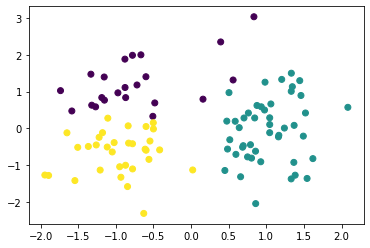

In [9]:
with open("clustering.pkl", "rb") as f:
    data_clustering = pickle.load(f)
    
X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

km = KMeans(n_clusters=3, random_state=99).fit(X)
centroids, labels = km.cluster_centers_, km.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

In [233]:
MAX_CLUSTERS = 10
c = np.array([[0, 0]])
for cluster_num in range(1, MAX_CLUSTERS):
    km = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2).fit(X)
    centroids, labels = km.cluster_centers_, km.labels_
    c = np.concatenate([c, centroids])

c = c[1:]
c_mean_1 = np.mean(c[0:-1:2], axis=0)
c_mean_2 = np.mean(c[1::2], axis=0)

In [238]:
c

array([[-0.99782309, -0.01028211],
       [ 0.95917947,  0.07757361],
       [-0.97742455, -0.03263543],
       [ 0.97792098,  0.10168404],
       [-0.09996863, -0.73138214],
       [ 0.11325871,  0.89820604],
       [ 0.87405271,  0.59826408],
       [-0.60697185, -0.35722706],
       [-0.31511577, -0.72701357],
       [ 0.3284842 ,  0.82714536],
       [ 0.95560823,  0.16450866],
       [-0.9551118 , -0.09546004],
       [ 0.7413805 ,  0.38612361],
       [-0.90558013, -0.39520817],
       [ 0.1817189 ,  0.89410591],
       [-0.16067862, -0.72774617],
       [-0.85662485,  1.00627193],
       [ 0.30131173, -0.30690053]])

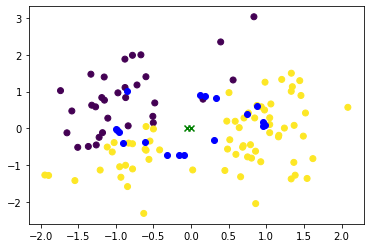

In [242]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(c[:, 0], c[:, 1], c="blue", marker="o")

# mean centers
plt.scatter(c_mean_1[0], c_mean_2[1], c="green", marker="x")
plt.scatter(c_mean_2[0], c_mean_2[1], c="green", marker="x")
plt.show()

In [16]:
km2, km4 = KMeans(n_clusters=2).fit(X), KMeans(n_clusters=4).fit(X)
score2, score4 = silhouette_score(X, km2.labels_), silhouette_score(X, km4.labels_)
print("Качество кластеризации по метрике силуэта для:\n2-х кластеров: %.3f,\n4-х кластеров: %.3f." % (score2, score4))

Качество кластеризации по метрике силуэта для:
2-х кластеров: 0.447,
4-х кластеров: 0.443.


Видно, что разделение датасета на 4 кластера лучше, чем на 2.

In [36]:
km2, km4 = KMeans(n_clusters=2).fit(X), KMeans(n_clusters=4).fit(X)
score2, score4 = adjusted_mutual_info_score(Y, km2.labels_, average_method='arithmetic'),\
                 adjusted_mutual_info_score(Y, km4.labels_, average_method='arithmetic')
                    

print("Качество кластеризации по метрике AMI для:\n2-х кластеров: %.3f,\n4-х кластеров: %.3f." % (score2, score4))

Качество кластеризации по метрике AMI для:
2-х кластеров: 0.929,
4-х кластеров: 0.582.


Видно, что разделение датасета на 2 кластера лучше, чем на 4.

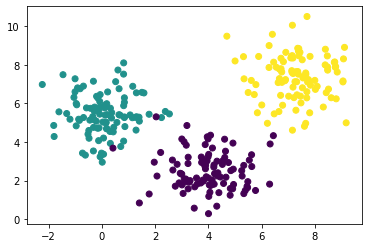

In [6]:
df = pd.read_csv("clustering_hw.csv")
plt.scatter(df.x1, df.x2, c=df.y)

In [100]:
x1 = np.array(df.x1).reshape(-1, 1)
x2 = np.array(df.x2).reshape(-1, 1)
Y = np.array(df.y)

X = np.concatenate([x1, x2], axis=1)

km2 = KMeans(n_clusters=3).fit(X)
score3 = adjusted_mutual_info_score(Y, km2.labels_, average_method='arithmetic')
print("Качество кластеризации по метрике AMI для:n3-х кластеров: %.3f." % score3)

Качество кластеризации по метрике AMI для:n3-х кластеров: 0.970.


In [98]:
print(f"Точка (5, 8) принадлежит кластеру {km2.predict([[5, 8]])[0]}.")
print(f"Точка (0, 5) принадлежит кластеру {km2.predict([[0, 5]])[0]}.")

Точка (5, 8) принадлежит кластеру 1.
Точка (0, 5) принадлежит кластеру 0.
